## Importing the Libraries

In [5]:
pip install feature-engine

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [7]:
data = pd.read_excel('/content/orders_data.xlsx')

In [8]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [9]:
data.shape

(171, 12)

# Exploratory Data Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [11]:
data.describe(include='all')

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
count,171,171,171,171,171,171,171,171.000000,153,145,47,171
unique,171,171,149,81,30,54,61,NaN,18,13,1,2
top,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Geetika,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,NaN,₹449.00,₹84.96,Cash On Delivery,Delivered to buyer
freq,1,1,3,17,31,33,33,NaN,52,100,47,160
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.087719,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445132,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [12]:
data.isnull().sum()

,0
order_no,0
order_date,0
buyer,0
ship_city,0
ship_state,0
sku,0
description,0
quantity,0
item_total,18
shipping_fee,26


We observe that there are null values in the dataset which needs to be handled.

In [13]:
#For items_total, we replace it with median of values

# Step 1: Create a clean numeric version (to remove ₹ and commas)
data['item_total_num'] = data['item_total'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
data['item_total_num'] = pd.to_numeric(data['item_total_num'], errors='coerce')

# Step 2: Calculate median
median_val = data['item_total_num'].median()

# Step 3: Fill missing values with median
data['item_total_num'].fillna(median_val, inplace=True)

# Step 4: Format back to ₹ format and assign to original column
data['item_total'] = data['item_total_num'].apply(lambda x: f"₹{x:,.2f}")

# Drop the numeric helper column
data.drop(columns=['item_total_num'], inplace=True)

In [14]:
#For shipping_fee, we replace it with ₹0 so no shipping fee

data['shipping_fee'] = data['shipping_fee'].fillna('₹0.00')

In [15]:
#For cod, it stands for cash on delivery so if its not cod then instead of NaN, we replace it with Prepaid

data['cod'].fillna('Prepaid', inplace=True)

In [16]:
data.isnull().sum()

,0
order_no,0
order_date,0
buyer,0
ship_city,0
ship_state,0
sku,0
description,0
quantity,0
item_total,0
shipping_fee,0


Thus all null values were handled successfully

In [17]:
data.duplicated().sum()

np.int64(0)

So we observe that there are no duplicated rows in the dataset

In [18]:
data.head(10)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,₹0.00,Prepaid,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,₹449.00,₹0.00,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,Prepaid,Delivered to buyer
5,406-9292208-6725123,"Thu, 17 Jun, 2021, 9:12 pm IST",Subinita,"HOWRAH,",WEST BENGAL,SKU: HH-FOWV-5YWO,Women's Trendy Pure Leather Clutch Purse | Lea...,1,₹200.00,₹0.00,Prepaid,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,₹449.00,₹0.00,Cash On Delivery,Returned to seller
7,405-8702211-4054722,"Wed, 29 Sept, 2021, 2:55 pm IST",Pratima,"BAREILLY,",UTTAR PRADESH,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,₹399.00,₹84.96,Cash On Delivery,Delivered to buyer
8,171-1434812-8061163,"Sat, 13 Nov, 2021, 7:37 pm IST",Ipshita,"BENGALURU,",KARNATAKA,SKU: 3F-4R9N-Z8NJ,Set of 2 Pure Leather Block Print Round Jewelr...,1,₹399.00,₹84.96,Prepaid,Delivered to buyer
9,171-7954707-4463549,"Mon, 9 Aug, 2021, 4:47 pm IST",A.Jayaprada,"Bhilai,",CHHATTISGARH,SKU: NU-CKZ5-4O49,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹0.00,Prepaid,Delivered to buyer


In [19]:
#We observe that in buyer names- some are fully lowercase, some uppercase, and similar in ship_city and for ship_state so we fix that
data['buyer'] = data['buyer'].str.title()
data['ship_city'] = data['ship_city'].str.title()
data['ship_city'] = data['ship_city'].str.replace(',', '', regex=False) #removing the commas from the ship_city column
data['ship_state'] = data['ship_state'].str.title()

In [20]:
data.head(10)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,Chandigarh,Chandigarh,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,₹0.00,Prepaid,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,Pasighat,Arunachal Pradesh,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",Yatipertin,Pasighat,Arunachal Pradesh,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",Aciya,Devarakonda,Telangana,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,₹449.00,₹0.00,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,Mumbai,Maharashtra,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,Prepaid,Delivered to buyer
5,406-9292208-6725123,"Thu, 17 Jun, 2021, 9:12 pm IST",Subinita,Howrah,West Bengal,SKU: HH-FOWV-5YWO,Women's Trendy Pure Leather Clutch Purse | Lea...,1,₹200.00,₹0.00,Prepaid,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",Shailendra,Orai,Uttar Pradesh,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,₹449.00,₹0.00,Cash On Delivery,Returned to seller
7,405-8702211-4054722,"Wed, 29 Sept, 2021, 2:55 pm IST",Pratima,Bareilly,Uttar Pradesh,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,₹399.00,₹84.96,Cash On Delivery,Delivered to buyer
8,171-1434812-8061163,"Sat, 13 Nov, 2021, 7:37 pm IST",Ipshita,Bengaluru,Karnataka,SKU: 3F-4R9N-Z8NJ,Set of 2 Pure Leather Block Print Round Jewelr...,1,₹399.00,₹84.96,Prepaid,Delivered to buyer
9,171-7954707-4463549,"Mon, 9 Aug, 2021, 4:47 pm IST",A.Jayaprada,Bhilai,Chhattisgarh,SKU: NU-CKZ5-4O49,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹0.00,Prepaid,Delivered to buyer


# Data Preparation

In [21]:
#removing unique items from the dataset, because if the data has more unique, there will be nothing to learn for the model to find any relationship with items as they are already unique
data.drop(['order_no', 'sku'], axis=1, inplace=True)
data.head(10)

,order_date,buyer,ship_city,ship_state,description,quantity,item_total,shipping_fee,cod,order_status
0,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,Chandigarh,Chandigarh,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,₹0.00,Prepaid,Delivered to buyer
1,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
2,"Sun, 28 Nov, 2021, 10:20 pm IST",Yatipertin,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
3,"Wed, 28 Jul, 2021, 4:06 am IST",Aciya,Devarakonda,Telangana,Pure 100% Leather Block Print Rectangular Jewe...,1,₹449.00,₹0.00,Cash On Delivery,Delivered to buyer
4,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,Mumbai,Maharashtra,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,Prepaid,Delivered to buyer
5,"Thu, 17 Jun, 2021, 9:12 pm IST",Subinita,Howrah,West Bengal,Women's Trendy Pure Leather Clutch Purse | Lea...,1,₹200.00,₹0.00,Prepaid,Delivered to buyer
6,"Thu, 12 Aug, 2021, 8:03 pm IST",Shailendra,Orai,Uttar Pradesh,Ultra Slim 100% Pure Leather Men's Wallet with...,1,₹449.00,₹0.00,Cash On Delivery,Returned to seller
7,"Wed, 29 Sept, 2021, 2:55 pm IST",Pratima,Bareilly,Uttar Pradesh,100% Pure Leather Shantiniketan Clutch Purse: ...,1,₹399.00,₹84.96,Cash On Delivery,Delivered to buyer
8,"Sat, 13 Nov, 2021, 7:37 pm IST",Ipshita,Bengaluru,Karnataka,Set of 2 Pure Leather Block Print Round Jewelr...,1,₹399.00,₹84.96,Prepaid,Delivered to buyer
9,"Mon, 9 Aug, 2021, 4:47 pm IST",A.Jayaprada,Bhilai,Chhattisgarh,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹0.00,Prepaid,Delivered to buyer


In [22]:
data['order_status'].value_counts()

,count
order_status,
Delivered to buyer,160
Returned to seller,11


In [23]:
#converting order_date from string type to date time format

# Step 1: Remove ' IST' suffix
data['order_date'] = data['order_date'].str.replace(' IST', '', regex=False)

# Step 2: Replace 'Sept' with 'Sep' to fix invalid month abbreviation
data['order_date'] = data['order_date'].str.replace('Sept', 'Sep', regex=False)

# Step 3: Convert to datetime
data['order_date'] = pd.to_datetime(data['order_date'], format="%a, %d %b, %Y, %I:%M %p")

In [24]:
#now removing the date
data.drop(['order_date'], axis=1, inplace=True)

In [25]:
data.head(10)

,buyer,ship_city,ship_state,description,quantity,item_total,shipping_fee,cod,order_status
0,Mr.,Chandigarh,Chandigarh,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,₹0.00,Prepaid,Delivered to buyer
1,Minam,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
2,Yatipertin,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,Prepaid,Delivered to buyer
3,Aciya,Devarakonda,Telangana,Pure 100% Leather Block Print Rectangular Jewe...,1,₹449.00,₹0.00,Cash On Delivery,Delivered to buyer
4,Susmita,Mumbai,Maharashtra,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,Prepaid,Delivered to buyer
5,Subinita,Howrah,West Bengal,Women's Trendy Pure Leather Clutch Purse | Lea...,1,₹200.00,₹0.00,Prepaid,Delivered to buyer
6,Shailendra,Orai,Uttar Pradesh,Ultra Slim 100% Pure Leather Men's Wallet with...,1,₹449.00,₹0.00,Cash On Delivery,Returned to seller
7,Pratima,Bareilly,Uttar Pradesh,100% Pure Leather Shantiniketan Clutch Purse: ...,1,₹399.00,₹84.96,Cash On Delivery,Delivered to buyer
8,Ipshita,Bengaluru,Karnataka,Set of 2 Pure Leather Block Print Round Jewelr...,1,₹399.00,₹84.96,Prepaid,Delivered to buyer
9,A.Jayaprada,Bhilai,Chhattisgarh,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹0.00,Prepaid,Delivered to buyer


In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

,0
buyer,0
ship_city,0
ship_state,0
description,0
quantity,0
item_total,0
shipping_fee,0
cod,0
order_status,0


# Univariate Analysis

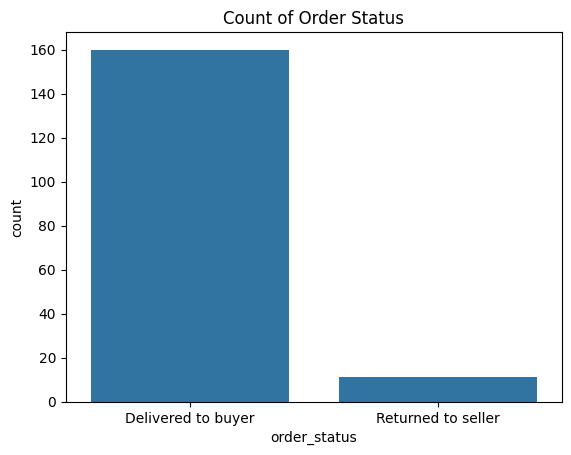

In [28]:
sns.countplot(x='order_status', data=data)
plt.title('Count of Order Status')
plt.show()

The plot thus shows that majority of the deliveries were delivered to buyer and some of them were returned

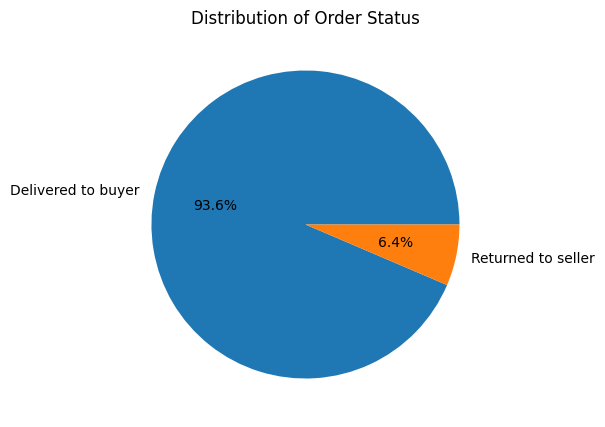

In [29]:
values = data['order_status'].value_counts().values
labels = data['order_status'].value_counts().index

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Order Status')
plt.show()

The pie chart shows that 93.6% of orders were delivered and 6.4% were returned

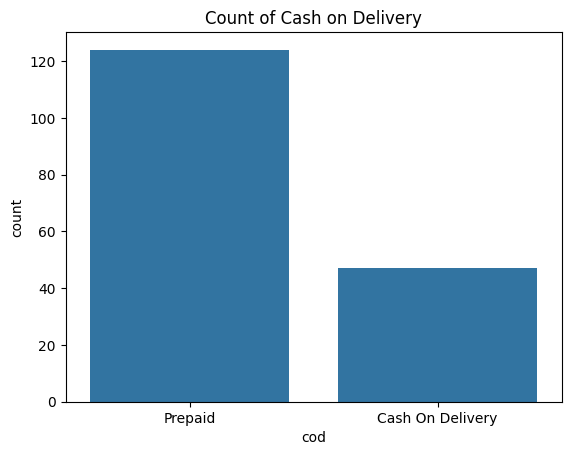

In [30]:
sns.countplot(x='cod', data=data)
plt.title('Count of Cash on Delivery')
plt.show()

The bar chart shows that most of the items were prepaid and some of them were cash on delivery

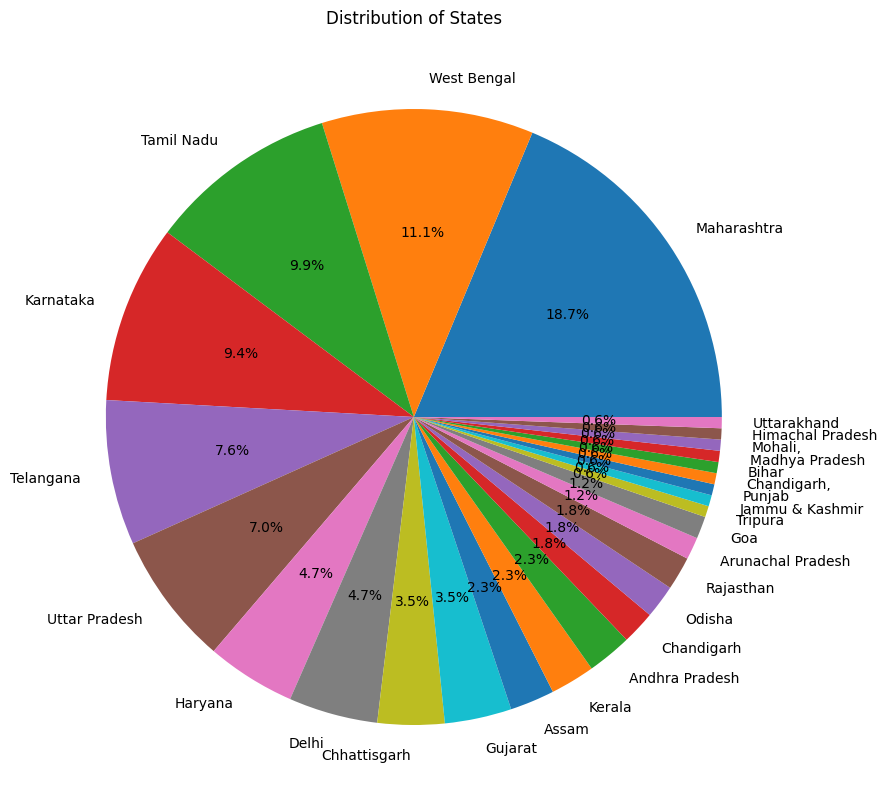

In [31]:
value = data['ship_state'].value_counts().values
label = data['ship_state'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(value, labels=label, autopct='%1.1f%%')
plt.title('Distribution of States')
plt.show()

We observe that most of the orders were from Maharashtra, followed by West Bengal, Tamil Nadu, Karnataka and so on.

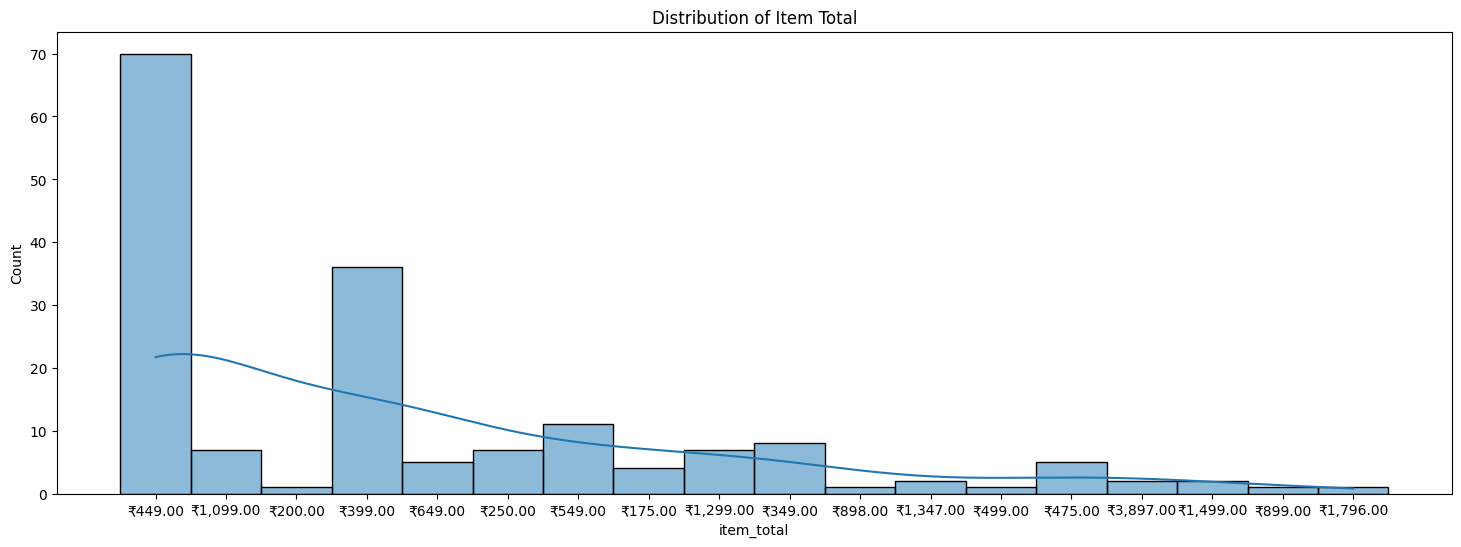

In [32]:
plt.figure(figsize=(18, 6))
sns.histplot(data['item_total'], kde=True)
plt.title('Distribution of Item Total')
plt.show()

The histogram shows us the distribution of total cost of items

# Bivariate Analysis

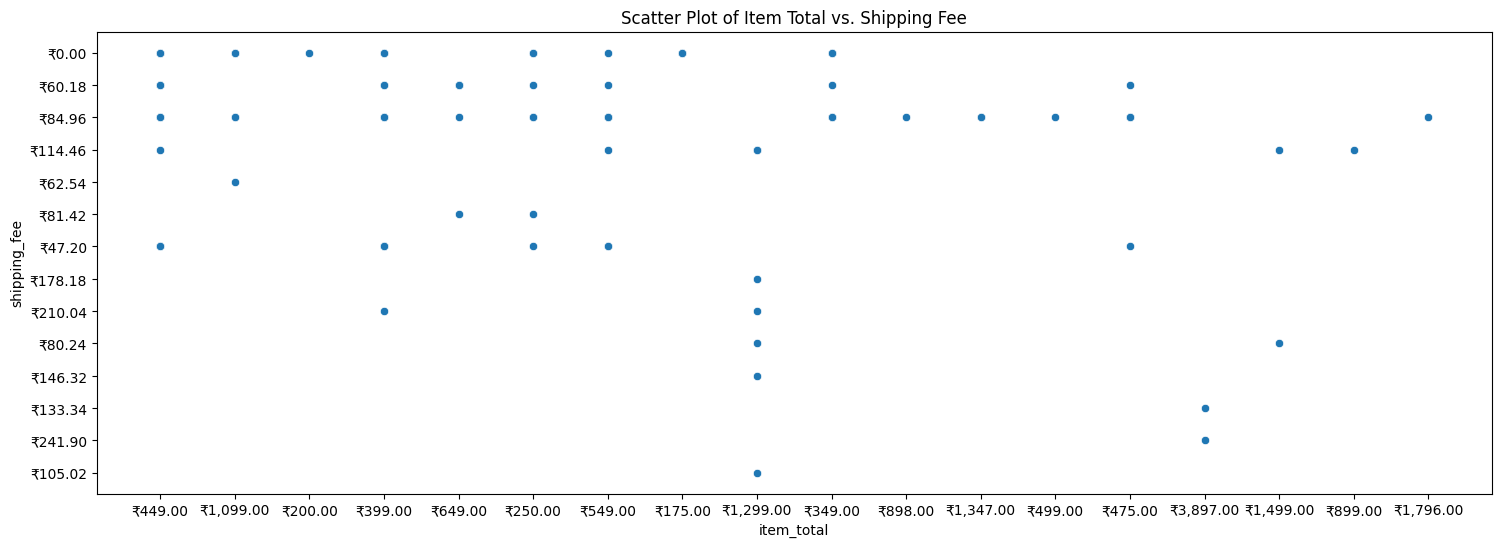

In [33]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='item_total', y='shipping_fee', data=data)
plt.title('Scatter Plot of Item Total vs. Shipping Fee')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

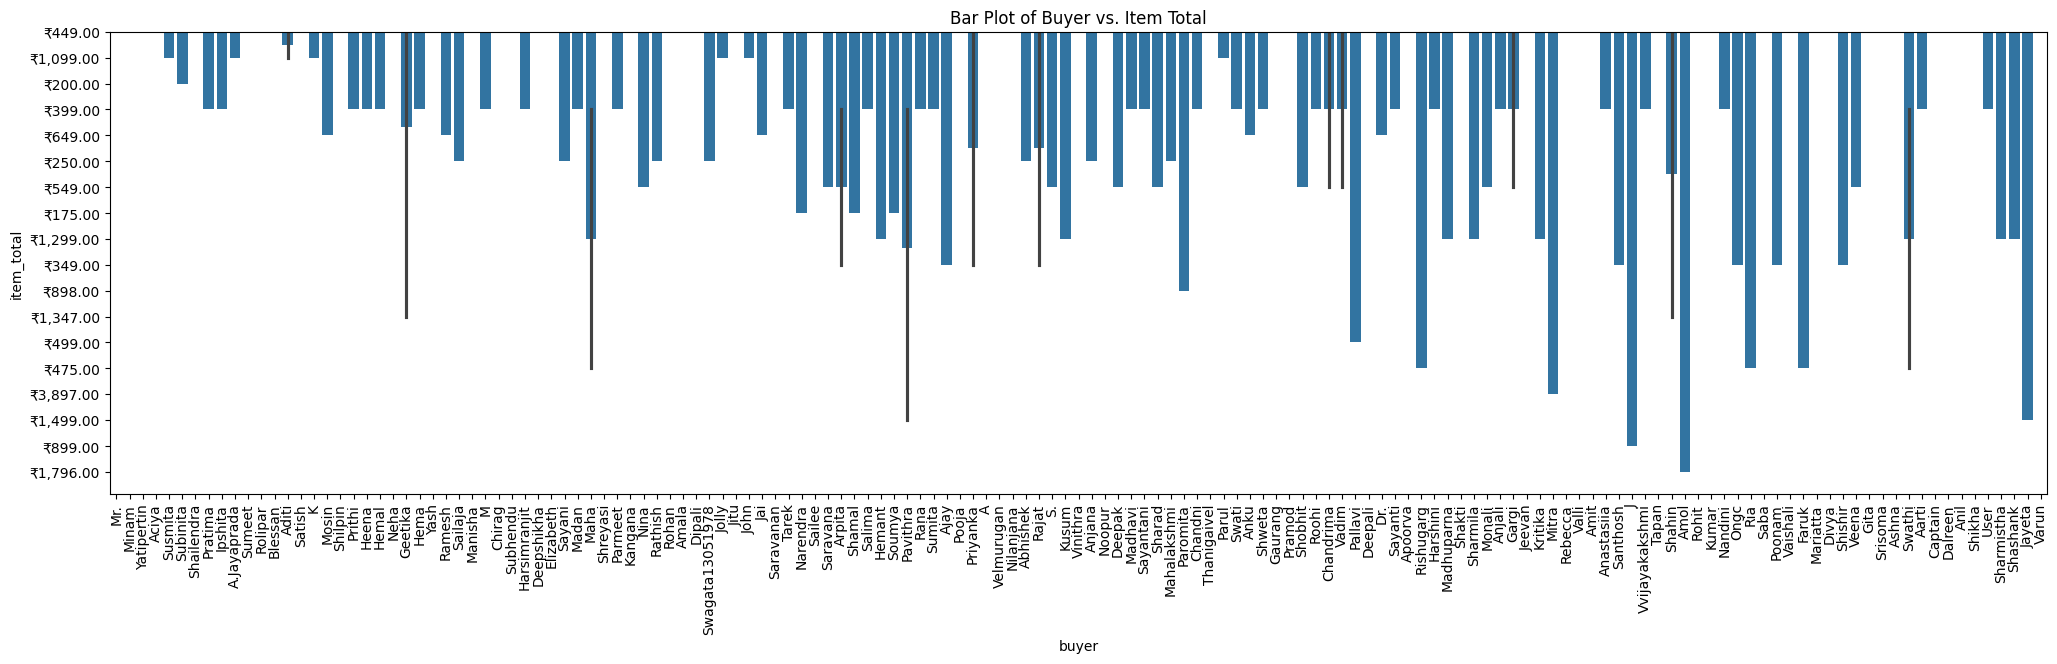

In [34]:
plt.figure(figsize=(25, 6))
sns.barplot(x='buyer', y='item_total', data=data)
plt.title('Bar Plot of Buyer vs. Item Total')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

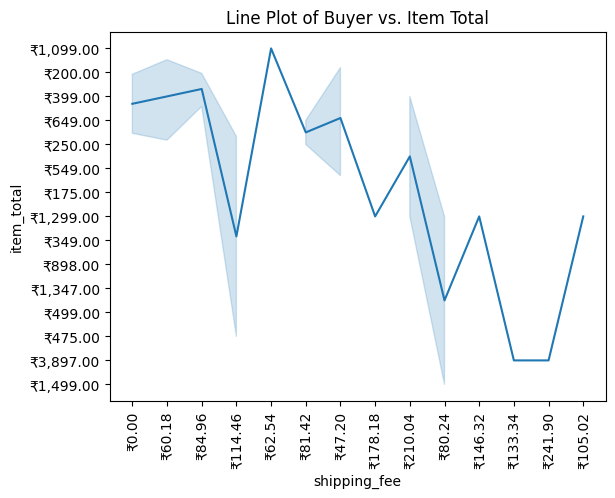

In [35]:
sns.lineplot(x='shipping_fee', y='item_total', data=data)
plt.title('Line Plot of Buyer vs. Item Total')
plt.xticks(rotation=90)
plt.show

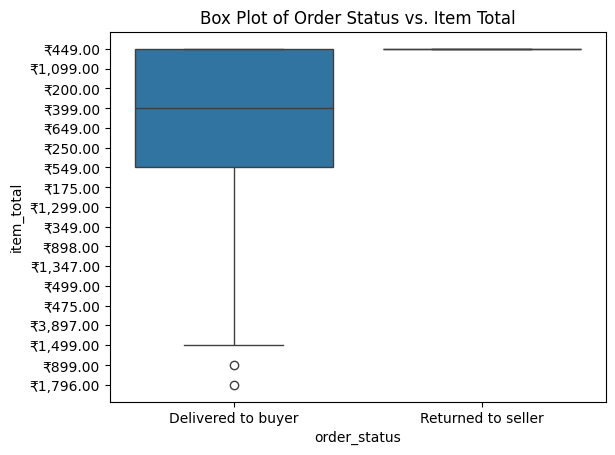

In [36]:
sns.boxplot(x='order_status', y='item_total', data=data)
plt.title('Box Plot of Order Status vs. Item Total')
plt.show()

# Multivariate Analysis

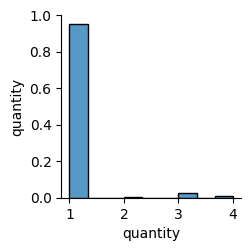

In [37]:
sns.pairplot(data)
plt.show()

It shows a combination of scatterplot for all columns

In [38]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['buyer', 'ship_city', 'ship_state', 'description', 'item_total',
       'shipping_fee', 'cod', 'order_status'],
      dtype='object')


In [39]:
data_numeric = data.select_dtypes(include=[np.number])
corr = data_numeric.corr()
print(corr)

          quantity
quantity       1.0


We get the correlation for the numeric values

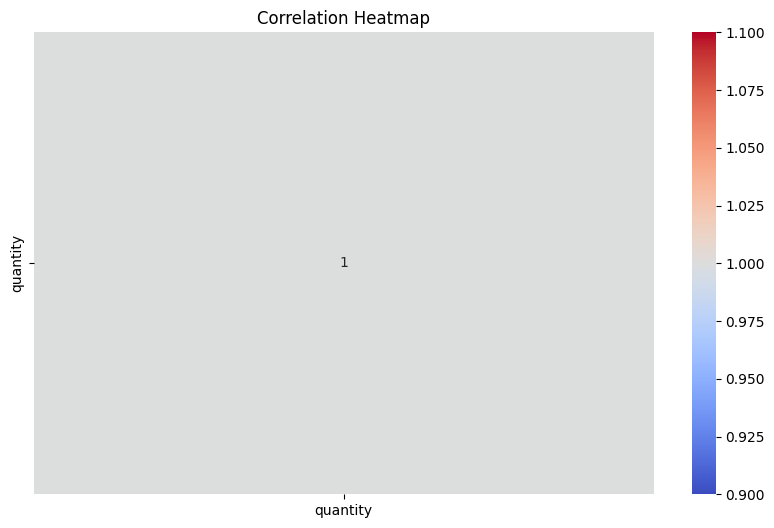

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix is thus obtained.

# Data Preprocessing

We observe that there are outliers and they need to be removed

In [41]:
# Convert all values to string (including NaN), then clean
data['item_total'] = data['item_total'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convert to numeric, coercing errors (e.g., "nan") to NaN
data['item_total'] = pd.to_numeric(data['item_total'], errors='coerce')

Q1 = data['item_total'].quantile(0.25)
Q3 = data['item_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows where item_total is within bounds
data = data[(data['item_total'] >= lower_bound) & (data['item_total'] <= upper_bound)]

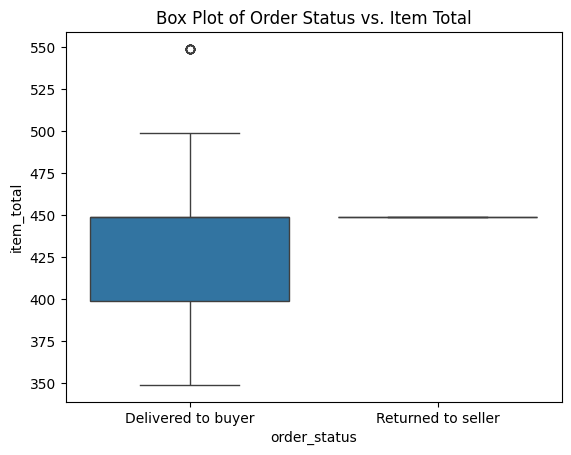

In [42]:
sns.boxplot(x='order_status', y='item_total', data=data)
plt.title('Box Plot of Order Status vs. Item Total')
plt.show()

In [43]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['item_total'])
data = winsorizer.fit_transform(data)
data

,buyer,ship_city,ship_state,description,quantity,item_total,shipping_fee,cod,order_status
0,Mr.,Chandigarh,Chandigarh,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,₹0.00,Prepaid,Delivered to buyer
1,Minam,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,₹60.18,Prepaid,Delivered to buyer
2,Yatipertin,Pasighat,Arunachal Pradesh,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,₹60.18,Prepaid,Delivered to buyer
3,Aciya,Devarakonda,Telangana,Pure 100% Leather Block Print Rectangular Jewe...,1,449.0,₹0.00,Cash On Delivery,Delivered to buyer
6,Shailendra,Orai,Uttar Pradesh,Ultra Slim 100% Pure Leather Men's Wallet with...,1,449.0,₹0.00,Cash On Delivery,Returned to seller
...,...,...,...,...,...,...,...,...,...
162,Shikha,Navi Mumbai,Maharashtra,Bright and Colorful Shantiniketan Leather Elep...,1,449.0,₹84.96,Prepaid,Delivered to buyer
163,Vadim,New Delhi,Delhi,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,₹84.96,Cash On Delivery,Delivered to buyer
164,Swathi,Visakhapatnam,Andhra Pradesh,Set of 2 Pure Leather Block Print Round Jewelr...,1,399.0,₹84.96,Prepaid,Delivered to buyer
165,User,Solan,Himachal Pradesh,100% Pure Leather Shantiniketan Clutch Purse: ...,1,399.0,₹84.96,Prepaid,Delivered to buyer


In [44]:
data['shipping_fee'] = data['shipping_fee'].astype(str)

data['shipping_fee'] = data['shipping_fee'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

data['shipping_fee'] = pd.to_numeric(data['shipping_fee'], errors='coerce')

# Categorical Handling

In [45]:
label_encoder = LabelEncoder()

In [46]:
data['buyer'] = label_encoder.fit_transform(data['buyer'])
data['ship_city'] = label_encoder.fit_transform(data['ship_city'])
data['ship_state'] = label_encoder.fit_transform(data['ship_state'])
data['description'] = label_encoder.fit_transform(data['description'])
data['cod'] = label_encoder.fit_transform(data['cod'])
data['order_status'] = label_encoder.fit_transform(data['order_status'])

In [47]:
data.head(10)

,buyer,ship_city,ship_state,description,quantity,item_total,shipping_fee,cod,order_status
0,48,11,4,1,1,449.0,0.00,1,0
1,46,42,1,45,1,449.0,60.18,1,0
2,112,42,1,45,1,449.0,60.18,1,0
3,2,15,22,26,1,449.0,0.00,0,0
6,84,41,24,39,1,449.0,0.00,0,1
7,61,5,24,4,1,399.0,84.96,0,0
8,35,6,13,34,1,399.0,84.96,1,0
10,95,17,10,1,1,449.0,114.46,1,0
11,71,0,23,45,1,449.0,60.18,1,0
12,13,13,21,19,1,449.0,84.96,0,0


# Scaling

We scale the numerical columns only, since quantity is mostly 1 and no significant difference, no need to scale that column

In [48]:
scaler = MinMaxScaler()
standardized_features = scaler.fit_transform(data[['item_total', 'shipping_fee']])
df1 = pd.DataFrame(standardized_features, columns=['item_total', 'shipping_fee'])
data.drop(['item_total', 'shipping_fee'], axis=1, inplace=True)
data = pd.concat([data, df1], axis=1)

In [49]:
data.head(10)

,buyer,ship_city,ship_state,description,quantity,cod,order_status,item_total,shipping_fee
0,48.0,11.0,4.0,1.0,1.0,1.0,0.0,0.571429,0.000000
1,46.0,42.0,1.0,45.0,1.0,1.0,0.0,0.571429,0.286517
2,112.0,42.0,1.0,45.0,1.0,1.0,0.0,0.571429,0.286517
3,2.0,15.0,22.0,26.0,1.0,0.0,0.0,0.571429,0.000000
6,84.0,41.0,24.0,39.0,1.0,0.0,1.0,0.285714,0.404494
7,61.0,5.0,24.0,4.0,1.0,0.0,0.0,0.571429,0.544944
8,35.0,6.0,13.0,34.0,1.0,1.0,0.0,0.571429,0.286517
10,95.0,17.0,10.0,1.0,1.0,1.0,0.0,0.571429,0.404494
11,71.0,0.0,23.0,45.0,1.0,1.0,0.0,0.571429,0.404494
12,13.0,13.0,21.0,19.0,1.0,0.0,0.0,0.285714,0.404494


In [50]:
data.dropna(inplace=True)

In [51]:
data['order_status'] = data['order_status'].astype(int)

In [52]:
data.dtypes

,0
buyer,float64
ship_city,float64
ship_state,float64
description,float64
quantity,float64
cod,float64
order_status,int64
item_total,float64
shipping_fee,float64


Splitting the data

In [53]:
x = data.drop('order_status', axis=1)
y = data['order_status']

In [54]:
x

,buyer,ship_city,ship_state,description,quantity,cod,item_total,shipping_fee
0,48.0,11.0,4.0,1.0,1.0,1.0,0.571429,0.000000
1,46.0,42.0,1.0,45.0,1.0,1.0,0.571429,0.286517
2,112.0,42.0,1.0,45.0,1.0,1.0,0.571429,0.286517
3,2.0,15.0,22.0,26.0,1.0,0.0,0.571429,0.000000
6,84.0,41.0,24.0,39.0,1.0,0.0,0.285714,0.404494
...,...,...,...,...,...,...,...,...
125,7.0,58.0,0.0,5.0,1.0,1.0,0.571429,0.404494
126,77.0,6.0,13.0,17.0,1.0,1.0,0.571429,0.404494
127,3.0,39.0,7.0,19.0,1.0,1.0,0.571429,0.404494
129,43.0,49.0,21.0,38.0,1.0,1.0,0.285714,0.404494


Imbalanced Handling

In [55]:
pd.Series(y).value_counts()

,count
order_status,
0,88
1,8


In [56]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sample, y_sample = smote.fit_resample(x, y)

In [57]:
x_sample

,buyer,ship_city,ship_state,description,quantity,cod,item_total,shipping_fee
0,48.000000,11.000000,4.000000,1.000000,1.0,1.000000,0.571429,0.000000
1,46.000000,42.000000,1.000000,45.000000,1.0,1.000000,0.571429,0.286517
2,112.000000,42.000000,1.000000,45.000000,1.0,1.000000,0.571429,0.286517
3,2.000000,15.000000,22.000000,26.000000,1.0,0.000000,0.571429,0.000000
4,84.000000,41.000000,24.000000,39.000000,1.0,0.000000,0.285714,0.404494
...,...,...,...,...,...,...,...,...
171,83.485842,40.228764,22.971685,37.457527,1.0,0.000000,0.285714,0.404494
172,86.086166,35.196328,16.000000,22.091802,1.0,0.000000,0.341808,0.404494
173,105.216328,35.813430,16.000000,6.664251,1.0,0.000000,0.518123,0.404494
174,28.966969,20.107441,9.140472,44.785118,1.0,0.892559,0.540731,0.299192


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

In [59]:
y_test.value_counts()

,count
order_status,
1,19
0,17


In [60]:
y_train.value_counts()

,count
order_status,
0,71
1,69


In [61]:
x_train

,buyer,ship_city,ship_state,description,quantity,cod,item_total,shipping_fee
156,27.937142,19.874283,10.125717,44.905712,1.000000,1.000000,0.571429,0.290225
136,26.273793,16.547586,13.452414,42.410690,1.000000,1.000000,0.571429,0.388344
98,37.965611,38.381007,6.828057,31.412662,3.896834,0.965611,0.975437,0.230901
157,31.272306,20.363590,7.091283,44.272821,1.000000,0.636410,0.467546,0.329412
38,75.000000,36.000000,16.000000,45.000000,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...
71,90.000000,39.000000,7.000000,11.000000,1.000000,1.000000,0.571429,0.404494
106,26.060831,16.121661,13.878339,42.091246,1.000000,1.000000,0.571429,0.400906
14,34.000000,37.000000,16.000000,41.000000,1.000000,1.000000,0.285714,0.404494
92,77.000000,6.000000,13.000000,17.000000,1.000000,1.000000,0.571429,0.404494


In [62]:
y_train

,order_status
156,1
136,1
98,1
157,1
38,0
...,...
71,0
106,1
14,0
92,0


In [63]:
x_test

,buyer,ship_city,ship_state,description,quantity,cod,item_total,shipping_fee
19,44.000000,44.000000,16.000000,45.000000,1.000000,0.000000,0.285714,0.404494
45,58.000000,20.000000,10.000000,45.000000,1.000000,1.000000,0.285714,1.000000
139,26.127117,16.254233,13.745767,42.190675,1.000000,1.000000,0.571429,0.396996
30,38.000000,39.000000,7.000000,31.000000,4.000000,1.000000,1.000000,0.224719
67,92.000000,36.000000,16.000000,30.000000,1.000000,1.000000,0.571429,0.404494
16,28.000000,20.000000,10.000000,45.000000,1.000000,1.000000,0.571429,0.286517
119,26.713507,17.427013,12.572987,43.070260,1.000000,1.000000,0.571429,0.362406
172,86.086166,35.196328,16.000000,22.091802,1.000000,0.000000,0.341808,0.404494
109,26.210345,16.420691,13.579309,42.315518,1.000000,1.000000,0.571429,0.392086
140,101.359548,35.689018,16.000000,9.774558,1.000000,0.000000,0.482576,0.404494


In [64]:
y_test

,order_status
19,0
45,0
139,1
30,1
67,0
16,1
119,1
172,1
109,1
140,1


# Model Building

In [65]:
model_1 = LogisticRegression(penalty='l2',C=0.01, solver='liblinear')
model_2 = KNeighborsClassifier(metric='manhattan', n_neighbors=2)
model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model_4 = RandomForestClassifier(n_estimators=88, max_depth=5, random_state=42)
model_5 = xgboost.XGBClassifier()
model_6 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model_7 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=1, random_state=42)

# Logistic Regression

In [66]:
model_1.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [67]:
y_sample_train1 = model_1.predict(x_sample)
y_pred_train1 = model_1.predict(x_train)
y_pred_test1 = model_1.predict(x_test)

In [68]:
sample_acc1 = accuracy_score(y_sample, y_sample_train1)
train_acc1 = accuracy_score(y_train, y_pred_train1)
test_acc1 = accuracy_score(y_test, y_pred_test1)

In [69]:
print('Sample Accuracy:', sample_acc1)
print('Training Accuracy:', train_acc1)
print('Testing Accuracy:', test_acc1)

Sample Accuracy: 0.6704545454545454
Training Accuracy: 0.6714285714285714
Testing Accuracy: 0.6666666666666666


In [70]:
print("cross_val_score:", cross_val_score(model_1, x_test, y_test, cv=4).mean())

cross_val_score: 0.5555555555555556


In [71]:
confusion_matrix(y_test, y_pred_test1)

array([[ 7, 10],
       [ 2, 17]])

# K Nearest Neighbors

In [72]:
model_2.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [73]:
y_sample_train2 = model_2.predict(x_sample)
y_pred_train2 = model_2.predict(x_train)
y_pred_test2 = model_2.predict(x_test)

In [74]:
sample_acc2 = accuracy_score(y_sample, y_sample_train2)
train_acc2 = accuracy_score(y_train, y_pred_train2)
test_acc2 = accuracy_score(y_test, y_pred_test2)

In [75]:
print('Sample Accuracy:', sample_acc2)
print('Training Accuracy:', train_acc2)
print('Testing Accuracy:', test_acc2)

Sample Accuracy: 0.9715909090909091
Training Accuracy: 0.9928571428571429
Testing Accuracy: 0.8888888888888888


In [76]:
print("cross_val_score:", cross_val_score(model_2, x_test, y_test, cv=4).mean())
print("cross_val_sample:", cross_val_score(model_2, x_sample, y_sample, cv=4).mean())

cross_val_score: 0.8333333333333333
cross_val_sample: 0.9375


In [77]:
confusion_matrix(y_test, y_pred_test2)

array([[14,  3],
       [ 1, 18]])

# Hyperparametric Tuning

In [78]:
knn = KNeighborsClassifier()

In [79]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [80]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [81]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [82]:
print("Best Hyperparamters:", grid_search.best_params_)
print("Best Score(Accuracy):", grid_search.best_score_)

Best Hyperparamters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score(Accuracy): 0.8928571428571429


In [83]:
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(x_test, y_test)
train_accuracy = best_knn.score(x_train, y_train)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.9166666666666666
Train Accuracy: 1.0


The parameters suggested by hyperparameter tuning arent working well, so we considering the previously used paramters.

# DecisionTreeClassifier

In [84]:
model_3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [85]:
y_sample_train3 = model_3.predict(x_sample)
y_pred_train3 = model_3.predict(x_train)
y_pred_test3 = model_3.predict(x_test)

In [86]:
sample_acc3 = accuracy_score(y_sample, y_sample_train3)
train_acc3 = accuracy_score(y_train, y_pred_train3)
test_acc3 = accuracy_score(y_test, y_pred_test3)

In [87]:
print('Sample Accuracy:', sample_acc3)
print('Training Accuracy:', train_acc3)
print('Testing Accuracy:', test_acc3)

Sample Accuracy: 0.9488636363636364
Training Accuracy: 0.9571428571428572
Testing Accuracy: 0.9166666666666666


In [88]:
print("cross_val_score:", cross_val_score(model_3, x_test, y_test, cv=4).mean())

cross_val_score: 0.8888888888888888


In [89]:
confusion_matrix(y_test, y_pred_test3)

array([[17,  0],
       [ 3, 16]])

# RandomForestClassifier

In [90]:
model_4.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=88, random_state=42)

In [91]:
y_sample_train4 = model_4.predict(x_sample)
y_pred_train4 = model_4.predict(x_train)
y_pred_test4 = model_4.predict(x_test)

In [92]:
sample_acc4 = accuracy_score(y_sample, y_sample_train4)
train_acc4 = accuracy_score(y_train, y_pred_train4)
test_acc4 = accuracy_score(y_test, y_pred_test4)

In [93]:
print('Sample Accuracy:', sample_acc4)
print('Training Accuracy:', train_acc4)
print('Testing Accuracy:', test_acc4)

Sample Accuracy: 0.9772727272727273
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9444444444444444


In [94]:
print("cross_val_score:", cross_val_score(model_4, x_test, y_test, cv=4).mean())

cross_val_score: 0.9166666666666666


In [95]:
precision = precision_score(y_test, y_pred_test4, average='weighted')
recall = recall_score(y_test, y_pred_test4, average='weighted')
f1 = f1_score(y_test, y_pred_test4, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9502923976608186
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444


In [96]:
print(confusion_matrix(y_test, y_pred_test4))

[[17  0]
 [ 2 17]]


# XGBoost

In [97]:
model_5.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
x_sample_train5 = model_5.predict(x_sample)
x_train_train5 = model_5.predict(x_train)
x_test_train5 = model_5.predict(x_test)

In [99]:
sample_acc5 = accuracy_score(y_sample, x_sample_train5)
train_acc5 = accuracy_score(y_train, x_train_train5)
test_acc5 = accuracy_score(y_test, x_test_train5)

In [100]:
print('Sample Accuracy:', sample_acc5)
print('Training Accuracy:', train_acc5)
print('Testing Accuracy:', test_acc5)

Sample Accuracy: 0.9659090909090909
Training Accuracy: 1.0
Testing Accuracy: 0.8333333333333334


In [101]:
print("cross_val_score:", cross_val_score(model_5, x_test, y_test, cv=4).mean())

cross_val_score: 0.8888888888888888


In [102]:
precision = precision_score(y_test, x_test_train5, average='weighted')
recall = recall_score(y_test, x_test_train5, average='weighted')
f1 = f1_score(y_test, x_test_train5, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


In [103]:
confusion_matrix(y_test, x_test_train5)

array([[14,  3],
       [ 3, 16]])

# AdaBoost

In [104]:
model_6.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [105]:
y_sample_train6 = model_6.predict(x_sample)
y_train_train6 = model_6.predict(x_train)
y_test_train6 = model_6.predict(x_test)

In [106]:
sample_acc6 = accuracy_score(y_sample, y_sample_train6)
train_acc6 = accuracy_score(y_train, y_train_train6)
test_acc6 = accuracy_score(y_test, y_test_train6)

In [107]:
print('Sample Accuracy:', sample_acc6)
print('Training Accuracy:', train_acc6)
print('Testing Accuracy:', test_acc6)

Sample Accuracy: 0.9545454545454546
Training Accuracy: 0.9928571428571429
Testing Accuracy: 0.8055555555555556


In [108]:
print("cross_val_score:", cross_val_score(model_6, x_test, y_test, cv=4).mean())

cross_val_score: 0.9166666666666666


In [109]:
precision = precision_score(y_test, y_test_train6, average='weighted')
recall = recall_score(y_test, y_test_train6, average='weighted')
f1 = f1_score(y_test, y_test_train6, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8070987654320988
Recall: 0.8055555555555556
F1 Score: 0.8057057057057058


In [110]:
confusion_matrix(y_test, y_test_train6)

array([[14,  3],
       [ 4, 15]])

# GradientBoostingClassifier

In [111]:
model_7.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, random_state=42)

In [112]:
y_sample_train7 = model_7.predict(x_sample)
y_train_train7 = model_7.predict(x_train)
y_test_train7 = model_7.predict(x_test)

In [113]:
sample_acc7 = accuracy_score(y_sample, y_sample_train7)
train_acc7 = accuracy_score(y_train, y_train_train7)
test_acc7 = accuracy_score(y_test, y_test_train7)

In [114]:
print('Sample Accuracy:', sample_acc7)
print('Training Accuracy:', train_acc7)
print('Testing Accuracy:', test_acc7)

Sample Accuracy: 0.9602272727272727
Training Accuracy: 0.9928571428571429
Testing Accuracy: 0.8333333333333334


In [115]:
print("cross_val_score:", cross_val_score(model_7, x_test, y_test, cv=4).mean())

cross_val_score: 0.861111111111111


In [116]:
precision = precision_score(y_test, y_test_train7, average='weighted')
recall = recall_score(y_test, y_test_train7, average='weighted')
f1 = f1_score(y_test, y_test_train7, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8384932920536635
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


In [117]:
confusion_matrix(y_test, y_test_train7)

array([[15,  2],
       [ 4, 15]])

# Model Testing

In our model evaluation results, models 4,6,7 are all good. So we can choose any of them. Lets take model_4

In [119]:
print(model_4.predict([[0.666667, 0.25, 0.234694, 0.306630, 0.123404, 0.423288, 1.000000, 0.732948]]))

[0]


In [120]:
print(model_4.predict([[0.666667, 0.75, 0.204082, 0.953039, 0.001418, 0.946575, 0.421683, 0.000000]]))

[0]


# Model Deployment

In [121]:
with open('model_k.pk1', 'wb') as file:
  pickle.dump(model_4, file)
print("Model saved to file")

Model saved to file


In [122]:
with open('model_k.pk1', 'rb') as file:
  model = pickle.load(file)
print("Model loaded from file")

Model loaded from file
